In [27]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import sklearn
print(sklearn.__version__)
print(np.__version__)

1.2.2
1.26.4


In [28]:
stress = pd.read_csv(r"C:\Sqi_projects\Machine_learning\stress.csv")
stress.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [29]:
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [30]:
print(stress.columns)

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)


In [31]:
df_stress = stress.drop(columns = ['post_id','id'])
df_stress.head()

,subreddit,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,5,1.806818,116,72.64,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,4,9.429737,109,79.08,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,2,7.769821,167,33.80,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,0,2.667798,273,2.98,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,24,7.554238,89,32.22,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [32]:
print(df_stress.shape)

(2838, 114)


In [33]:
print("Sum of missing value:","\n",df_stress.isnull().sum())

Sum of missing value: 
 subreddit                   0
sentence_range              0
text                        0
label                       0
confidence                  0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 114, dtype: int64


In [34]:
df_stress = df_stress.dropna()
print("Datashape after cleaning:","", df_stress.shape)
df_stress.head()

Datashape after cleaning:  (2838, 114)


,subreddit,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,5,1.806818,116,72.64,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,4,9.429737,109,79.08,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,2,7.769821,167,33.80,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,0,2.667798,273,2.98,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,24,7.554238,89,32.22,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [35]:
import nltk
import re

In [38]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from nltk.corpus import stopwords

In [40]:
import string

In [41]:
stopword = set(stopwords.words('english'))

In [43]:
# def clean(text):
#     text = str(text).lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('https?://\s+|www\.\s+', '', text)
#     text = re.sub('<.?>+', '', text)
#     text = re.sub('[%s]'% re.escape(string.punctuation),'', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = [word for word in text.split('') if word not in stopword]
#     text = " ".join(text)
#     text = [stemmer.stem(word) for word in text.split('')]
#     text = " ".join(text)
#     return text
# df_stress["text"] = df_stress["text"].apply(clean)


def clean(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing digits
    # Remove stopwords
    text = [word for word in text.split() if word not in stopword]
    text = " ".join(text)
    # Apply stemming
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    return text

# Apply cleaning to the 'text' column
df_stress['text'] = df_stress['text'].apply(clean)

In [47]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

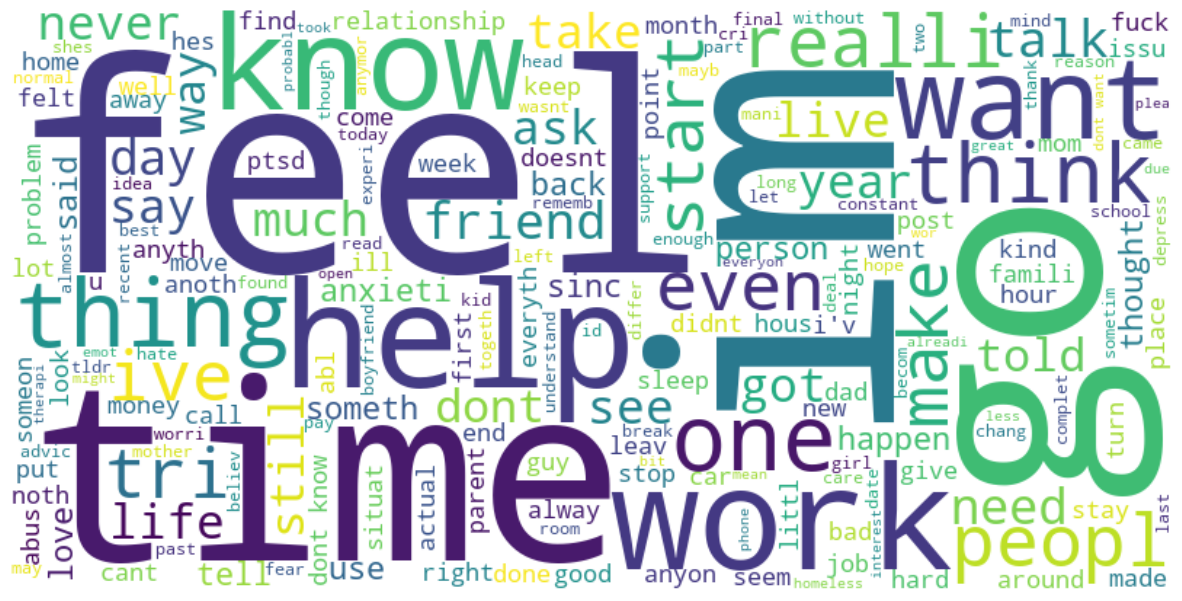

In [48]:
text = " ".join(i for i in df_stress.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,background_color = "white", width=800, height=400).generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
df_stress["label"] = df_stress["label"].map({0:"No Stress", 1:"Stress"})

In [51]:
df_stress = df_stress[["text", "label"]]
df_stress

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curre...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress
...,...,...
2833,week ago precious ignor jan happi year preciou...,No Stress
2834,dont abil cope anymor im tri lot thing trigger...,Stress
2835,case first time your read post look peopl will...,No Stress
2836,find normal good relationship main problem see...,No Stress


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [59]:
x = np.array(df_stress["text"])
y = np.array(df_stress["label"])

In [60]:
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3, random_state=42)

In [61]:
from sklearn.naive_bayes import BernoulliNB

In [64]:
model = BernoulliNB()

In [65]:
model.fit(xtrain,ytrain)

BernoulliNB()

In [87]:
user = input("Text")

Text  i am not feeling well


In [88]:
user_input_vectorized = cv.transform([user]).toarray()

In [89]:
output = model.predict(user_input_vectorized)  # Predict the stress level based on the input

# Print the prediction
print(f"The predicted stress level is: {output[0]}")

The predicted stress level is: No Stress


In [77]:
output

array(['No Stress'], dtype='<U9')